# <font color='blue'> ColorBayes: </font>
ColorBayes is an algorithm based on Bayesian inference that corrects local color distortions generated by artifitial light (LED) in high-throughput plant phenotyping image. The algorithm estimates the local illuminants using the Bayes' rule, the maximum a posteriori, the observed image data, and prior illuminant information. <br/>

### Import &rarr; Python modules
The Bayesian color correction program needs multiple Python modules to run properly

In [1]:
import os
import cv2
import datetime
import numpy as np
import pandas as pd

### Import &rarr; User modules
We created our own modules to organize the code and follow the object oriented programming philosophy

In [2]:
import colorBayes
import checkerCards
import plotting

### Declaration of Global variables
Define the Experiment & camera ID details

In [3]:
expID, daySowing, cam = 'exp05', '2018-01-05-11-00', 'cam03' # Color Constancy
checker_angle = 0
refleClothD65 = np.array([45 , 79, 40])/255 # Cloth reflectance under D65 illuminant
colrLable = ['blu', 'grn', 'red']

### Directories 
Define the folder paths where is located the green fabric dataset

In [4]:
dirCurrent      = os.getcwd()
dirParent       = os.path.abspath(os.path.join(dirCurrent, os.pardir)) 
root            = os.path.join(dirParent, expID)
folder_images   = os.path.join(root, expID + '_' + 'img')
masks_folder    = os.path.join(root, expID + '_' + 'imgMasks',expID+ '_' + 'mask')
coor_path       = os.path.join(root, expID + '_coord_' + cam + '.csv')
colrCard_path   = os.path.join(root, '24ColorCard' + '.csv')
path_potTempl   = os.path.join(root, 'potTempl.png')

### Read files & set Variables
Parameters for the image prespective and lens

In [5]:
list_images = [x for x in os.listdir(folder_images) if (x[-3:])=="png"]
coor_df = pd.read_csv(coor_path)
coor_df['col_centre'] = (coor_df.loc[:, "left"] + (coor_df.loc[:, "width"]/2)).values
coor_df['row_centre'] = (coor_df.loc[:, "top"] + (coor_df.loc[:, "height"]/2)).values
colorChecker = pd.read_csv(colrCard_path)
colorChecker = checkerCards.addXYZ(colorChecker)
potTemp = cv2.imread(path_potTempl)[:, :,0]


Get the priors

In [6]:
priorIll = pd.read_csv(os.path.join(dirParent, "cloth", 'prior' + '_' +  'Illum' + '_' + cam + '.csv'))

Load test image

In [7]:
cnt = 0
imgName = list_images[cnt]
imgNumb = imgName.split(".")[0]
imgPath = os.path.join(folder_images, imgName)    
bgrSrc = cv2.imread(imgPath,cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)    

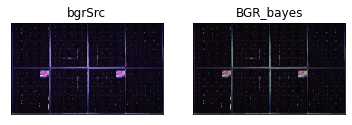

In [8]:

bgr_bayes = colorBayes.correct_bayes(bgrSrc, colorChecker, 
                                     coor_df, checker_angle, 
                                     priorIll, imgNumb, colrLable)